# Neural Networks

This tutorial is based on [CS231n Winter 2016: Lecture 4: Backpropagation, Neural Networks 1](https://cs231n.github.io/neural-networks-1/), [video](https://www.youtube.com/watch?v=i94OvYb6noo&list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC&index=4).

In [1]:
import numpy as np
from sklearn.datasets import *
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


def softmax(s,axis=0):
    """
        Vectorized computation of softmax function
        Parameters
        ----------
        s : shape=(N,K). s[i,j] represents the score of j.th class given i.th input.

        Returns
        -------
        probs:shape=(N,K) probs[i,j] represents the predicted probability of j.th class given i.th input
        
        Examples
        -------
    """
    s-=np.max(s,axis=axis,keepdims=True)
    exp_scores=np.exp(s)
    probs=exp_scores/np.sum(exp_scores,axis=axis,keepdims=True)
    return probs

def spiral_data_gen(flag_plotting=False):

    N = 100 # number of points per class
    D = 2 # dimensionality
    K = 3 # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j            
    if flag_plotting:
        # lets visualize the data:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()
    return X,y

# Train a Vanilla Neural Network

In [2]:
def NNClassifier(X,y,num_epoch=50_000,hidden_size=500,reg=0.0,step_size=.01,plot=False):
    X=X.T
    D,N=X.shape
    K=len(np.unique(y))
    
    # initialize parameters randomly
    h = hidden_size # size of hidden layer
    W = 0.01 * np.random.randn(h,D)
    b = np.zeros((h,1))
    W2 = 0.01 * np.random.randn(K,h)
    b2 = np.zeros((K,1))
    
    mode=num_epoch//10

    
    for i in range(num_epoch):
    
        # forward pass - compute predictions
        Z = np.maximum(0, W.dot(X)+ b)# ReLU
        S =softmax(W2.dot(Z) + b2)

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(S[y,range(N)])
        data_loss = np.sum(corect_logprobs)/N
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
        loss = data_loss + reg_loss
        
        if i % mode == 0:
            print("Epoch %d: loss %f" % (i, loss))


        # compute the gradient on predicted probs
        # Derivative of loss w.r.t. ouput of softmax.
        dS = S
        dS[y,range(N)] -= 1
        dS /= N

        # backpropate the gradient to the parameters
        # first backprop into parameters W2 and b2  
        dW2=dS.dot(Z.T)
        db2 = np.sum(dS, axis=1, keepdims=True)


        dZ=W2.T.dot(dS) 
        # backprop the ReLU non-linearity
        dZ[Z <= 0] = 0

        # finally into W,b

        dW=dZ.dot(X.T)
        db = np.sum(dZ, axis=1, keepdims=True)


        # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        W2 += -step_size * dW2
        b2 += -step_size * db2
    
 
    probs=softmax(W2.dot(np.maximum(0, W.dot(X)+ b)) + b2)    
    predicted_class = np.argmax(probs, axis=0)
    print(classification_report(y, predicted_class))

    
    if plot:
        X=X.T
        W=W.T
        W2=W2.T
        b2=b2.T
        b=b.T
        # plot the resulting classifier
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        fig = plt.figure()
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
    

Epoch 0: loss 1.098431
Epoch 5000: loss 0.690809
Epoch 10000: loss 0.649676
Epoch 15000: loss 0.598423
Epoch 20000: loss 0.506088
Epoch 25000: loss 0.393059
Epoch 30000: loss 0.311223
Epoch 35000: loss 0.259396
Epoch 40000: loss 0.223997
Epoch 45000: loss 0.198258
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       100
           1       0.92      0.94      0.93       100
           2       0.94      0.91      0.92       100

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



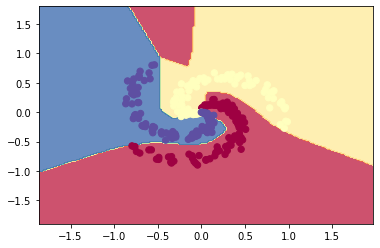

In [3]:
X,y=spiral_data_gen()
NNClassifier(X,y,plot=True)